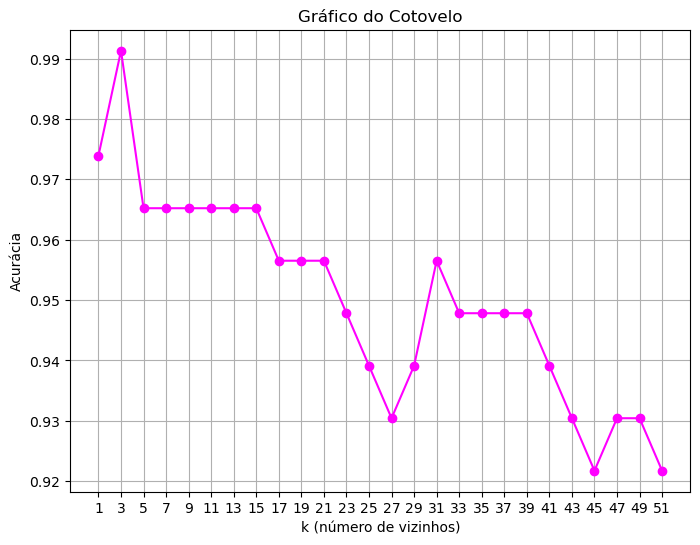

99.13%


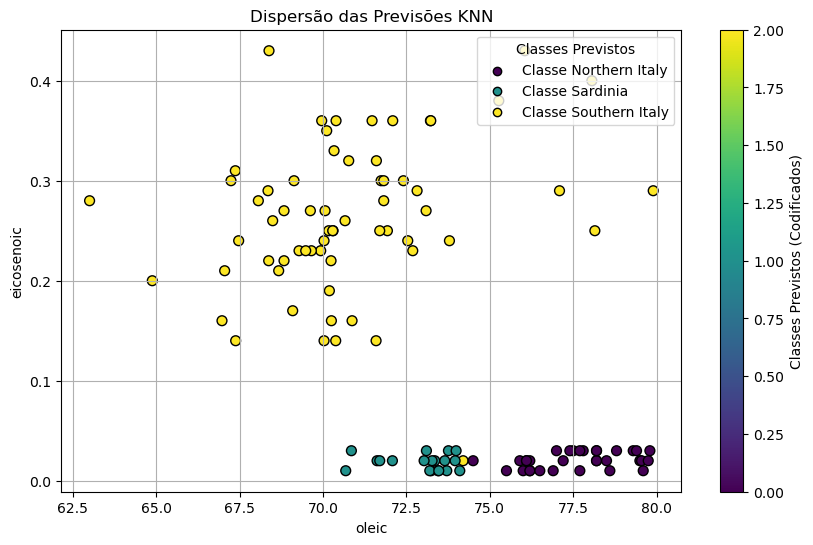

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors  
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore", category=UserWarning)


dados = pd.read_csv('olive.csv')
xtreino, xteste = train_test_split(dados, test_size=0.2, random_state=32, shuffle=True)

ytreino = xtreino['region'].values
yteste = xteste['region'].values
xtreino = xtreino.drop(columns=['region'])
xteste = xteste.drop(columns=['region'])

# Gráfico do Cotovelo para escolher o melhor valor de k
ks = list(range(1, 52, 2))
acuracias = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtreino, ytreino)
    y_pred = knn.predict(xteste)
    accuracy = accuracy_score(yteste, y_pred)
    acuracias.append(accuracy)

# Plotar o gráfico do Cotovelo
plt.figure(figsize=(8, 6))
plt.plot(ks, acuracias, marker='o', linestyle='-', color='magenta')
plt.title('Gráfico do Cotovelo')
plt.xlabel('k (número de vizinhos)')
plt.ylabel('Acurácia')
plt.xticks(ks)
plt.grid(True)
plt.show()

# Escolher o valor de k = 3 para o gráfico de dispersão
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtreino, ytreino)
y_pred = knn.predict(xteste)

feature1 = xteste.columns[3]
feature2 = xteste.columns[7]

label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(xteste[feature1], xteste[feature2], c=y_pred_encoded, cmap='viridis', s=50, edgecolor='k')

plt.title('Dispersão das Previsões KNN')
plt.xlabel(feature1)
plt.ylabel(feature2)

cbar = plt.colorbar(scatter)
cbar.set_label('Classes Previstos (Codificados)')

unique_classes = np.unique(y_pred)
for i, class_value in enumerate(unique_classes):
    plt.scatter([], [], c=scatter.cmap(i / (len(unique_classes) - 1)), label=f'Classe {class_value}', edgecolor='k')

plt.legend(title="Classes Previstos", loc='upper right')

plt.grid(True)

print(f"{accuracy_score(yteste, y_pred) * 100:.2f}%")

cursor = mplcursors.cursor(scatter, hover=True)

# Customizar o cursor para mostrar o valor de 'region' ao passar o mouse
@cursor.connect("add")
def on_add(sel):
    index = sel.index
    sel.annotation.set_text(f"region: {yteste[index]}")

plt.show()

